## Training model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('../data/roberta_train.csv')
test = pd.read_csv('../data/roberta_test.csv')

In [18]:
len(train), len(test)

(25000, 25000)

### Bins

I'll try to separate rating into 2, 3 and 5 bins. 

- 2 bins - positive and negative
- 3 bins - positive, neutral and negative
- 5 bins - from strongly negative to strongly positive

In [19]:
from math import ceil

def five_bins(x):
    return ceil(x / 2)

def three_bins(x):
    if x <= 3:
        return 0
    
    elif x <=6:
        return 1
    
    return 2

def two_bins(x):
    return 1 if x > 5 else 0

In [20]:
train['two_bins'] = train['rating'].apply(two_bins)
train['three_bins'] = train['rating'].apply(three_bins)
train['five_bins'] = train['rating'].apply(five_bins)
train.head()

,rating,neg,neu,pos,two_bins,three_bins,five_bins
0,7,-0.531845,0.619221,-0.044027,1,2,4
1,10,-1.119548,-0.347246,1.918200,1,2,5
2,10,-0.124219,0.337150,-0.207956,1,2,5
3,10,-2.534032,0.128516,2.739633,1,2,5
4,10,-1.682061,0.453609,1.442397,1,2,5


In [21]:
train.describe()

,rating,neg,neu,pos,two_bins,three_bins,five_bins
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,25000.000000
mean,5.477720,-0.018480,0.127644,0.002857,0.50000,1.107840,2.984440
std,3.466477,1.583001,0.363694,1.787606,0.50001,0.938385,1.650862
min,1.000000,-3.450105,-1.144533,-2.985000,0.00000,0.000000,1.000000
25%,2.000000,-1.410177,-0.093660,-1.463492,0.00000,0.000000,1.000000
50%,5.500000,0.030347,0.165885,-0.383358,0.50000,1.500000,3.000000
75%,9.000000,1.183842,0.370517,1.400316,1.00000,2.000000,5.000000
max,10.000000,3.416885,1.553279,4.220171,1.00000,2.000000,5.000000


<AxesSubplot:>

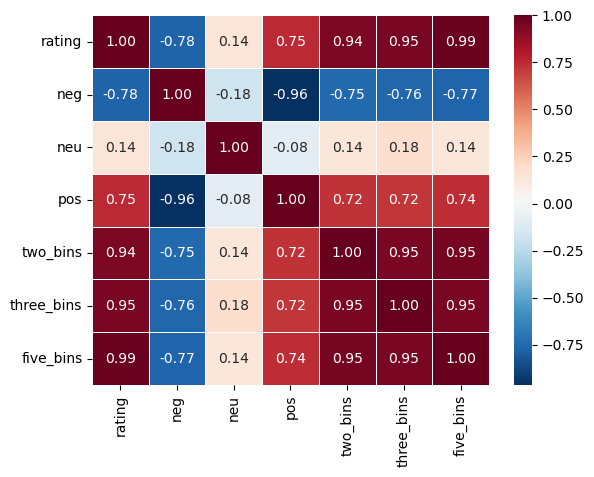

In [29]:
import seaborn as sns

sns.heatmap(data=train.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='RdBu_r')

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train.drop(['rating', 'two_bins', 'three_bins', 'five_bins'], axis=1), 
                                                  train[['two_bins', 'three_bins', 'five_bins']], test_size=0.2)

Let's train three SVMs on three sets

In [32]:
from sklearn.svm import SVC

clf_2 = SVC()
clf_2.fit(X_train, y_train['two_bins'])

scores = {'two_bins': clf_2.score(X_val, y_val['two_bins'])}

clf_3 = SVC()
clf_3.fit(X_train, y_train['three_bins'])

scores['three_bins'] =  clf_3.score(X_val, y_val['three_bins'])

clf_5 = SVC()
clf_5.fit(X_train, y_train['five_bins'])

scores['five_bins'] =  clf_5.score(X_val, y_val['five_bins'])


In [33]:
scores

{'two_bins': 0.873, 'three_bins': 0.8006, 'five_bins': 0.5664}

- results from paper for binary classification - 57%
- results from github for five_bins classification - 57-60%

### Results

My finding are pretty close to what I've been able to find. For this project, I choose three_bins classification.

# Test Set

In [34]:
test['two_bins'] = test['rating'].apply(two_bins)
test['three_bins'] = test['rating'].apply(three_bins)
test['five_bins'] = test['rating'].apply(five_bins)
test.head()

,rating,neg,neu,pos,two_bins,three_bins,five_bins
0,7,-1.040968,0.731092,0.329521,1,2,4
1,10,-1.799022,-0.148663,2.211571,1,2,5
2,7,-1.174041,0.242648,1.093486,1,2,4
3,10,-2.464963,-0.277825,3.324916,1,2,5
4,9,0.026421,0.432137,-0.479554,1,2,5


Let's look just at clf_3

In [36]:
clf_3.score(test.drop(['two_bins','three_bins', 'five_bins', 'rating'], axis=1), 
            test['three_bins'])

0.79648